<h1>ResNet : Oussama FIKRI, Brahim GOUALI et Hamza BOUKHRISSE</h1>

# Importation des bibliothèques

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import imageio

from fastai import *
from fastai.vision import *
from fastai.vision.all import *

<h3>Chargement des données</h3>

In [3]:
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [4]:
classes = { 0:'akiec',1:'bcc', 2 :'bkl',3:'df',4: 'nv',5:'vasc', 6:'mel'}

In [5]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


<h3>Séparation de l'entraînement et du test</h3>

In [7]:
# Sélection des colonnes 'pixel0000' à 'pixel2351' dans le DataFrame
df_x = df.loc[:, 'pixel0000':'pixel2351']

In [8]:
df_x

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,181,208,185,187,208,186,186,206,187,189
10011,2,3,1,38,33,32,121,104,103,132,...,129,96,79,76,24,23,21,3,4,1
10012,132,118,118,167,149,149,175,156,160,184,...,190,204,181,178,181,159,153,172,151,145
10013,160,124,146,164,131,152,167,127,146,169,...,165,185,162,167,184,157,166,185,162,172


In [9]:
df_y = df.loc[:,'label']

In [10]:
df_y

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Instanciation de la classe RandomOverSampler
oversample = RandomOverSampler()

# Suréchantillonnage des données en utilisant RandomOverSampler
df_x, df_y = oversample.fit_resample(df_x, df_y)

# Réorganisation de df_x en un tableau de dimensions (-1, 28, 28, 3)
df_x = np.array(df_x).reshape(-1, 28, 28, 3)

# Affichage de la forme de df_x
print('Shape of X:', df_x.shape)

Shape of X : (46935, 28, 28, 3)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y, test_size=0.2, random_state=1)

In [13]:
np_x_train = np.array(X_train)
np_x_test = np.array(X_test)
np_x_train.shape
np_x_test.shape

(9387, 28, 28, 3)

<h3>Redimensionnement des données de l'entrainement</h3>


In [14]:
X_train = np.array(np_x_train).reshape(-1,28, 28,3)
X_test = np.array(np_x_test).reshape(-1,28, 28,3)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

80% training , 20% testing

In [15]:
print("training",X_train.shape)
print(Y_train.shape)
print("testing",X_test.shape)
print(Y_test.shape)

training (37548, 28, 28, 3)
(37548,)
testing (9387, 28, 28, 3)
(9387,)


### Exploration analytique des données (EDA)

In [16]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


Text(0.5, 1.0, 'Frequency Distribution of Classes')

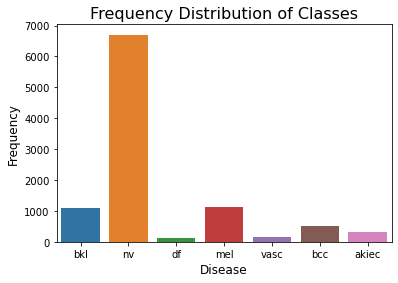

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracé du graphique de comptage des catégories dans la colonne 'dx' du DataFrame 'tabular_data'
sns.countplot(x='dx', data=tabular_data)

# Définition de l'étiquette de l'axe des abscisses
plt.xlabel('Disease', size=12)

# Définition de l'étiquette de l'axe des ordonnées
plt.ylabel('Frequency', size=12)

# Définition du titre du graphique
plt.title('Frequency Distribution of Classes', size=16)

# Affichage du graphique
plt.show()

### Répartition de la maladie selon le sexe

Text(0.5, 1.0, 'Gender of Patient')

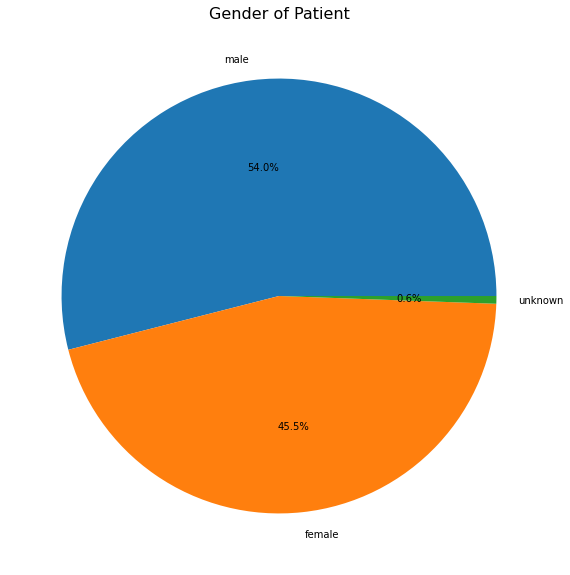

In [18]:
import matplotlib.pyplot as plt

# Création d'une figure et d'un axe pour le graphique
fig, ax = plt.subplots(figsize=(10, 10))

# Tracé du diagramme circulaire de la répartition des valeurs dans la colonne 'sex' du DataFrame 'tabular_data'
plt.pie(tabular_data['sex'].value_counts(), labels=tabular_data['sex'].value_counts().index, autopct="%.1f%%")

# Définition du titre du graphique
plt.title('Gender of Patient', size=16)

# Affichage du graphique
plt.show()

### Localisation de la maladie selon le sexe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

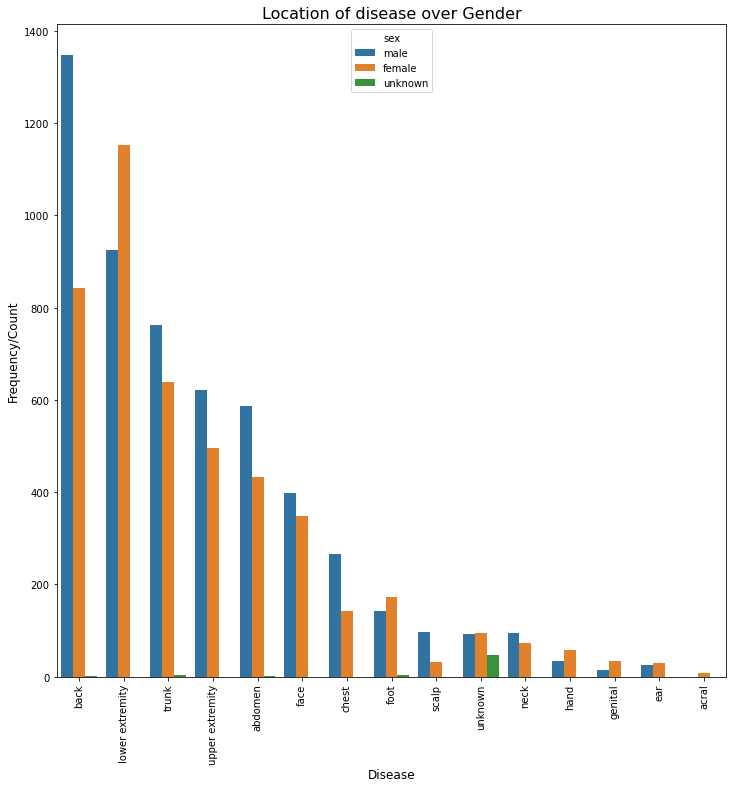

In [19]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'localization': 'location', 0: 'count'})

# Création d'une figure et d'un axe pour le graphique
bar, ax = plt.subplots(figsize=(12, 12))

# Tracé du graphique à barres en utilisant seaborn
sns.barplot(x='location', y='count', hue='sex', data=temp)

# Définition du titre du graphique
plt.title('Location of disease over Gender', size=16)

# Définition de l'étiquette de l'axe des abscisses
plt.xlabel('Disease', size=12)

# Définition de l'étiquette de l'axe des ordonnées
plt.ylabel('Frequency/Count', size=12)

# Rotation des étiquettes de l'axe des abscisses à 90 degrés
plt.xticks(rotation=90)

# Affichage du graphique
plt.show()

## Entraînement du modèle

In [20]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
from keras import layers
from keras.models import Sequential
from keras.applications import ResNet50

# Fonction pour construire le modèle
def build_model(backbone):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(7, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)))
    model.compile(loss='sparse_categorical_crossentropy', optimizer="adagrad", metrics=['accuracy'])
    return model

# Instanciation du modèle ResNet50 pré-entraîné sur ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Construction du modèle final en utilisant la fonction build_model
model = build_model(resnet)

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 23,610,247
Trainable params: 23,553,031
Non-trainable params: 57,216
_________________________________________________________________


In [21]:
from keras.callbacks import EarlyStopping

# Définition du callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [22]:
history = model.fit(X_train, Y_train,epochs=25,validation_split=.2,callbacks=[early_stopping])

Epoch 1/25
939/939 [==============================] - 33s 35ms/step - loss: 4.2955 - accuracy: 0.5787 - val_loss: 3.2036 - val_accuracy: 0.8063
Epoch 2/25
939/939 [==============================] - 32s 34ms/step - loss: 2.9338 - accuracy: 0.7769 - val_loss: 2.3813 - val_accuracy: 0.8796
Epoch 3/25
939/939 [==============================] - 32s 34ms/step - loss: 2.2423 - accuracy: 0.8398 - val_loss: 1.8371 - val_accuracy: 0.9137
Epoch 4/25
939/939 [==============================] - 32s 34ms/step - loss: 1.7678 - accuracy: 0.8756 - val_loss: 1.4406 - val_accuracy: 0.9286
Epoch 5/25
939/939 [==============================] - 32s 34ms/step - loss: 1.4152 - accuracy: 0.9010 - val_loss: 1.1528 - val_accuracy: 0.9409
Epoch 6/25
939/939 [==============================] - 32s 34ms/step - loss: 1.1595 - accuracy: 0.9152 - val_loss: 0.9342 - val_accuracy: 0.9521
Epoch 7/25
939/939 [==============================] - 32s 34ms/step - loss: 0.9632 - accuracy: 0.9280 - val_loss: 0.7793 - val_accuracy:

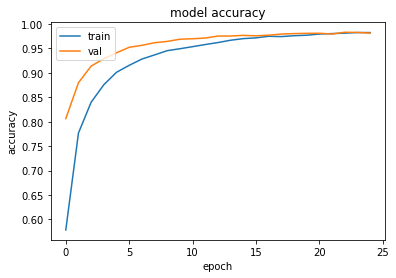

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

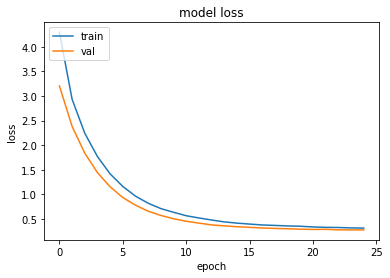

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
loss, acc = model.evaluate(X_test,Y_test, verbose=2)

294/294 - 3s - loss: 0.2875 - accuracy: 0.9783


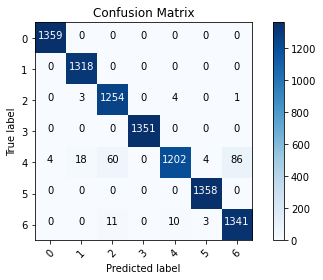

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Obtenir les prédictions
y_pred = np.argmax(model.predict(X_test), axis=-1)  # Convertir les probabilités prédites en étiquettes de classe

# Étape 2 : Préparer les étiquettes réelles
y_true = Y_test

# Étape 3 : Créer une matrice de confusion vide
cm = confusion_matrix(y_true, y_pred)
classes = np.unique(y_true)  # Classes uniques dans le jeu de données

# Étape 4 : Remplir la matrice de confusion

# Tracer la matrice de confusion
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Ajouter des étiquettes au graphique
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [27]:
model.save('best_model.h5')

In [28]:
import tensorflow as tf

model = tf.keras.models.load_model('best_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("best_model1.tflite", "wb").write(tflite_model)

94050348

### Test du modèle

In [35]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Charger et prétraiter une seule image de test
image_path = "/kaggle/input/basedir/base_dir/val_dir/vasc/ISIC_0024706.jpg"
img = Image.open(image_path)
img = img.resize((256, 256))  # Redimensionner l'image en 256x256 pixels
img_array = np.array(img)
preprocessed_img = img_array.reshape((1, 256, 256, 3))  # Remodeler pour correspondre à la forme d'entrée attendue

# Charger le modèle TFLite
model_path = '/kaggle/working/best_model1.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Obtenir les détails d'entrée et de sortie
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Définir le tenseur d'entrée
input_data = np.array(preprocessed_img, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

# Exécuter l'inférence
interpreter.invoke()

# Obtenir le tenseur de sortie
output_data = interpreter.get_tensor(output_details[0]['index'])

# Effectuer la prédiction
predicted_class = np.argmax(output_data)
print("Classe prédite:", predicted_class)

Predicted class: 2


In [45]:
import numpy as np
from PIL import Image
from tensorflow import keras

# Charger et prétraiter une seule image de test
image_path = "/kaggle/input/basedir/base_dir/val_dir/mel/ISIC_0030445.jpg"
img = Image.open(image_path)
img = img.resize((28, 28))  # Redimensionner l'image en 28x28 pixels
img_array = np.array(img)
preprocessed_img = img_array.reshape((1, 28, 28, 3))  # Remodeler pour correspondre à la forme d'entrée attendue

# Charger le modèle
model = keras.models.load_model('/kaggle/working/best_model.h5')

# Effectuer la prédiction
predictions = model.predict(preprocessed_img)
predicted_class = np.argmax(predictions)
print("Classe prédite:", predicted_class)

Predicted class: 6
